<a href="https://colab.research.google.com/github/frank-baring/public/blob/main/Sports_Analytics_NFL_Big_Data_Bowl_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports and Loading in The Data

In [ ]:
import sys
import os
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.formula.api as smf


from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/Sports Analytics Project/')


sys.path.insert(0,'/content/drive/My Drive/Sports Analytics Project')
import SportsAnalytics as sa

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
## Loading in Onside Kicks Data
data_2021 = pd.read_excel('NFL 10 Year Onside Kick Data.xlsx', sheet_name = '2021')
data_2020 = pd.read_excel('NFL 10 Year Onside Kick Data.xlsx', sheet_name = '2020')
data_2019 = pd.read_excel('NFL 10 Year Onside Kick Data.xlsx', sheet_name = '2019')
data_2018 = pd.read_excel('NFL 10 Year Onside Kick Data.xlsx', sheet_name = '2018')
data_2017 = pd.read_excel('NFL 10 Year Onside Kick Data.xlsx', sheet_name = '2017')
data_2016 = pd.read_excel('NFL 10 Year Onside Kick Data.xlsx', sheet_name = '2016')
data_2015 = pd.read_excel('NFL 10 Year Onside Kick Data.xlsx', sheet_name = '2015')
data_2014 = pd.read_excel('NFL 10 Year Onside Kick Data.xlsx', sheet_name = '2014')
data_2013 = pd.read_excel('NFL 10 Year Onside Kick Data.xlsx', sheet_name = '2013')
data_2012 = pd.read_excel('NFL 10 Year Onside Kick Data.xlsx', sheet_name = '2012')

In [ ]:
data_2021 = data_2021[['Player', 'Games', 'Onside Kickoffs', 'Onside Recovered']]
data_2020 = data_2020[['Player', 'Games', 'Onside Kickoffs', 'Onside Recovered']]
data_2019 = data_2019[['Player', 'Games', 'Onside Kickoffs', 'Onside Recovered']]
data_2018 = data_2018[['Player', 'Games', 'Onside Kickoffs', 'Onside Recovered']]
data_2017 = data_2017[['Player', 'Games', 'Onside Kickoffs', 'Onside Recovered']]
data_2016 = data_2016[['Player', 'Games', 'Onside Kickoffs', 'Onside Recovered']]
data_2015 = data_2015[['Player', 'Games', 'Onside Kickoffs', 'Onside Recovered']]
data_2014 = data_2014[['Player', 'Games', 'Onside Kickoffs', 'Onside Recovered']]
data_2013 = data_2013[['Player', 'Games', 'Onside Kickoffs', 'Onside Recovered']]
data_2012 = data_2012[['Player', 'Games', 'Onside Kickoffs', 'Onside Recovered']]

In [ ]:
data_2021['Year'] = 2021
data_2020['Year'] = 2020
data_2019['Year'] = 2019
data_2018['Year'] = 2018
data_2017['Year'] = 2017
data_2016['Year'] = 2016
data_2015['Year'] = 2015
data_2014['Year'] = 2014
data_2013['Year'] = 2013
data_2012['Year'] = 2012

<ipython-input-4-88a3c9900db6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2021['Year'] = 2021
<ipython-input-4-88a3c9900db6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2020['Year'] = 2020
<ipython-input-4-88a3c9900db6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

In [ ]:
df_final = pd.concat([data_2021, data_2020, data_2019, data_2018, data_2017, data_2016, data_2015, data_2014, data_2013, data_2012], axis = 0)

In [ ]:
fg_data_2021 = pd.read_excel('kicker_data-2.xlsx', sheet_name = '2021', header = 1)
fg_data_2020 = pd.read_excel('kicker_data-2.xlsx', sheet_name = '2020', header = 1)
fg_data_2019 = pd.read_excel('kicker_data-2.xlsx', sheet_name = '2019', header = 1)
fg_data_2018 = pd.read_excel('kicker_data-2.xlsx', sheet_name = '2018', header = 1)
fg_data_2017 = pd.read_excel('kicker_data-2.xlsx', sheet_name = '2017', header = 1)
fg_data_2016 = pd.read_excel('kicker_data-2.xlsx', sheet_name = '2016', header = 1)
fg_data_2015 = pd.read_excel('kicker_data-2.xlsx', sheet_name = '2015', header = 1)
fg_data_2014 = pd.read_excel('kicker_data-2.xlsx', sheet_name = '2014', header = 1)
fg_data_2013 = pd.read_excel('kicker_data-2.xlsx', sheet_name = '2013', header = 1)
fg_data_2012 = pd.read_excel('kicker_data-2.xlsx', sheet_name = '2012', header = 1)

In [ ]:
fg_data_2021.columns

Index(['Rk', 'Player', 'Tm', 'Age', 'Pos', 'G', 'GS', 'FGA', 'FGM', 'FGA.1',
       'FGM.1', 'FGA.2', 'FGM.2', 'FGA.3', 'FGM.3', 'FGA.4', 'FGM.4', 'FGA.5',
       'FGM.5', 'Lng', 'FG%', 'XPA', 'XPM', 'XP%', 'KO', 'KOYds', 'TB', 'TB%',
       'KOAvg', 'Pnt', 'Yds', 'Lng.1', 'Blck', 'Y/P'],
      dtype='object')

In [ ]:
## Getting only Field Goals that are kicked from 30+ Yards
fg_data_2021['FGM.6'] = fg_data_2021['FGM.2'] + fg_data_2021['FGM.3'] + fg_data_2021['FGM.4']
fg_data_2020['FGM.6'] = fg_data_2020['FGM.2'] + fg_data_2020['FGM.3'] + fg_data_2020['FGM.4']
fg_data_2019['FGM.6'] = fg_data_2019['FGM.2'] + fg_data_2019['FGM.3'] + fg_data_2019['FGM.4']
fg_data_2018['FGM.6'] = fg_data_2018['FGM.2'] + fg_data_2018['FGM.3'] + fg_data_2018['FGM.4']
fg_data_2017['FGM.6'] = fg_data_2017['FGM.2'] + fg_data_2017['FGM.3'] + fg_data_2017['FGM.4']
fg_data_2016['FGM.6'] = fg_data_2016['FGM.2'] + fg_data_2016['FGM.3'] + fg_data_2016['FGM.4']
fg_data_2015['FGM.6'] = fg_data_2015['FGM.2'] + fg_data_2015['FGM.3'] + fg_data_2015['FGM.4']
fg_data_2014['FGM.6'] = fg_data_2014['FGM.2'] + fg_data_2014['FGM.3'] + fg_data_2014['FGM.4']
fg_data_2013['FGM.6'] = fg_data_2013['FGM.2'] + fg_data_2013['FGM.3'] + fg_data_2013['FGM.4']
fg_data_2012['FGM.6'] = fg_data_2012['FGM.2'] + fg_data_2012['FGM.3'] + fg_data_2012['FGM.4']

In [ ]:
## Getting only Field Goals that are kicked from 30+ Yards
fg_data_2021['FGA.6'] = fg_data_2021['FGA.2'] + fg_data_2021['FGA.3'] + fg_data_2021['FGA.4']
fg_data_2020['FGA.6'] = fg_data_2020['FGA.2'] + fg_data_2020['FGA.3'] + fg_data_2020['FGA.4']
fg_data_2019['FGA.6'] = fg_data_2019['FGA.2'] + fg_data_2019['FGA.3'] + fg_data_2019['FGA.4']
fg_data_2018['FGA.6'] = fg_data_2018['FGA.2'] + fg_data_2018['FGA.3'] + fg_data_2018['FGA.4']
fg_data_2017['FGA.6'] = fg_data_2017['FGA.2'] + fg_data_2017['FGA.3'] + fg_data_2017['FGA.4']
fg_data_2016['FGA.6'] = fg_data_2016['FGA.2'] + fg_data_2016['FGA.3'] + fg_data_2016['FGA.4']
fg_data_2015['FGA.6'] = fg_data_2015['FGA.2'] + fg_data_2015['FGA.3'] + fg_data_2015['FGA.4']
fg_data_2014['FGA.6'] = fg_data_2014['FGA.2'] + fg_data_2014['FGA.3'] + fg_data_2014['FGA.4']
fg_data_2013['FGA.6'] = fg_data_2013['FGA.2'] + fg_data_2013['FGA.3'] + fg_data_2013['FGA.4']
fg_data_2012['FGA.6'] = fg_data_2012['FGA.2'] + fg_data_2012['FGA.3'] + fg_data_2012['FGA.4']

In [ ]:
fg_data_2021 = fg_data_2021[['Player', 'G', 'FGA.6', 'FGM.6']]
fg_data_2020 = fg_data_2020[['Player', 'G', 'FGA.6', 'FGM.6']]
fg_data_2019 = fg_data_2019[['Player', 'G', 'FGA.6', 'FGM.6']]
fg_data_2018 = fg_data_2018[['Player', 'G', 'FGA.6', 'FGM.6']]
fg_data_2017 = fg_data_2017[['Player', 'G', 'FGA.6', 'FGM.6']]
fg_data_2016 = fg_data_2016[['Player', 'G', 'FGA.6', 'FGM.6']]
fg_data_2015 = fg_data_2015[['Player', 'G', 'FGA.6', 'FGM.6']]
fg_data_2014 = fg_data_2014[['Player', 'G', 'FGA.6', 'FGM.6']]
fg_data_2013 = fg_data_2013[['Player', 'G', 'FGA.6', 'FGM.6']]
fg_data_2012 = fg_data_2012[['Player', 'G', 'FGA.6', 'FGM.6']]

In [ ]:
fg_data_2021['Year'] = 2021
fg_data_2020['Year'] = 2020
fg_data_2019['Year'] = 2019
fg_data_2018['Year'] = 2018
fg_data_2017['Year'] = 2017
fg_data_2016['Year'] = 2016
fg_data_2015['Year'] = 2015
fg_data_2014['Year'] = 2014
fg_data_2013['Year'] = 2013
fg_data_2012['Year'] = 2012

<ipython-input-11-4efbba0b9e84>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fg_data_2021['Year'] = 2021
<ipython-input-11-4efbba0b9e84>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fg_data_2020['Year'] = 2020
<ipython-input-11-4efbba0b9e84>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

In [ ]:
fg_df_final = pd.concat([fg_data_2021, fg_data_2020, fg_data_2019, fg_data_2018, fg_data_2017, fg_data_2016, fg_data_2015, fg_data_2014, fg_data_2013, fg_data_2012], axis = 0)

In [ ]:
fg_df_final = fg_df_final.rename(columns = {'FGA.6':'FGA', 'FGM.6':'FGM'})

In [ ]:
fg_df_final['Player'] = fg_df_final['Player'].apply(lambda x: x.strip('+*'))

# Luck vs. Skill Onside Kicks

In [ ]:
df_final

,Player,Games,Onside Kickoffs,Onside Recovered,Year
0,Greg Zuerlein,16,1,0,2021
1,Dustin Hopkins,17,2,0,2021
2,Matt Gay,17,3,0,2021
3,Tyler Bass,17,1,0,2021
4,Jake Elliott,17,2,0,2021
...,...,...,...,...,...
45,Britton Colquitt,16,0,0,2012
46,Zoltan Mesko,16,0,0,2012
47,Donnie Jones,16,0,0,2012
48,Garrett Hartley,16,2,0,2012


In [ ]:
df_final['Make Percentage'] = df_final['Onside Recovered']/df_final['Onside Kickoffs']

Data still required:


*   Possession data for each team for each season






Regression model:
x axis: make rate for onside kickoff attempts
y axis: posession percentage





*   Go back and get data for last 10 years rather than 5 years since onside kickoffs are quite rare 




In [ ]:
player_df = df_final.groupby(['Player'])[['Onside Kickoffs', 'Onside Recovered']].sum()

In [ ]:
player_df['Percentage Recovered'] = player_df['Onside Recovered']/player_df['Onside Kickoffs']

In [ ]:
player_df

,Onside Kickoffs,Onside Recovered,Percentage Recovered
Player,,,
Aaron Brewer,1,0,0.000000
Adam Podlesh,0,0,NaN
Aldrick Rosas,7,1,0.142857
Alex Henery,5,1,0.200000
Alex Kessman,0,0,NaN
...,...,...,...
Wil Lutz,9,1,0.111111
Younghoe Koo,6,3,0.500000
Zach Hocker,0,0,NaN


In [ ]:
player_df = player_df.dropna()

In [ ]:
pd.Series(player_df['Percentage Recovered']).value_counts()

0.000000    57
0.500000     5
0.125000     4
0.142857     4
0.333333     4
0.100000     4
0.250000     3
0.166667     3
0.200000     2
0.428571     2
0.062500     2
0.111111     2
0.285714     2
0.222222     2
0.066667     1
0.187500     1
1.000000     1
0.600000     1
0.083333     1
0.095238     1
0.444444     1
Name: Percentage Recovered, dtype: int64

In [ ]:
player_df

,Onside Kickoffs,Onside Recovered,Percentage Recovered
Player,,,
Aaron Brewer,1,0,0.000000
Aldrick Rosas,7,1,0.142857
Alex Henery,5,1,0.200000
Andrew Franks,2,0,0.000000
Austin Seibert,6,2,0.333333
...,...,...,...
Ty Long,2,0,0.000000
Tyler Bass,1,0,0.000000
Wil Lutz,9,1,0.111111


In [ ]:
#can use population st_dev for the sample st_dev (you don't need a player by player st dev)
pop_mean = sa.Average(player_df['Percentage Recovered'], player_df['Onside Kickoffs'])
pop_stdev = sa.Stddev(player_df['Percentage Recovered'], player_df['Onside Kickoffs'])

sample_mean = player_df['Percentage Recovered']

## We do standard deviation like this because we have a bernoulli random variable (2 outcomes [recovered or not], and so our stdev is sqrt(p*(1-p)))

#player_df['std_dev_os'] = np.sqrt(player_df[['Percentage Recovered']]*(1-player_df[['Percentage Recovered']]))
#sample_stdev = player_df['std_dev_os']
sample_stdev = sa.Stddev(player_df['Percentage Recovered'], player_df['Onside Kickoffs'])

n_obs = player_df['Onside Kickoffs']

recover_rate_bayes, std = sa.Bayes_normal(mean = pop_mean, stdev = pop_stdev, Nob = n_obs, sample_mean = sample_mean, sample_stdev = sample_stdev)

player_df['Percentage Recovered Bayes'] = recover_rate_bayes


<ipython-input-23-061760990551>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_df['Percentage Recovered Bayes'] = recover_rate_bayes


In [ ]:
player_df

,Onside Kickoffs,Onside Recovered,Percentage Recovered,Percentage Recovered Bayes
Player,,,,
Aaron Brewer,1,0,0.000000,0.065109
Aldrick Rosas,7,1,0.142857,0.141277
Alex Henery,5,1,0.200000,0.188370
Andrew Franks,2,0,0.000000,0.043406
Austin Seibert,6,2,0.333333,0.304317
...,...,...,...,...
Ty Long,2,0,0.000000,0.043406
Tyler Bass,1,0,0.000000,0.065109
Wil Lutz,9,1,0.111111,0.113022


In [ ]:
player_df = player_df.sort_values('Percentage Recovered Bayes', ascending = 0)

player_df = player_df.reset_index(drop = False)

#player_df = player_df.dropna()

player_df

,Player,Onside Kickoffs,Onside Recovered,Percentage Recovered,Percentage Recovered Bayes
0,Giorgio Tavecchio,1,1,1.000000,0.565109
1,Cody Parkey,10,6,0.600000,0.557292
2,Younghoe Koo,6,3,0.500000,0.447174
3,Pat McAfee,9,4,0.444444,0.413022
4,Ka'imi Fairbairn,7,3,0.428571,0.391277
...,...,...,...,...,...
98,Mike Nugent,6,0,0.000000,0.018602
99,Graham Gano,7,0,0.000000,0.016277
100,Ryan Succop,12,0,0.000000,0.010017
101,Jason Myers,13,0,0.000000,0.009301


In [ ]:
player_df = player_df.rename(columns = {'Percentage Recovered':'Percentage_Recovered', 'Percentage Recovered Bayes':'Percentage_Recovered_Bayes'})

In [ ]:
## IGNORE - THIS IS MEANT TO DOWNLOAD THE PLAYER RANKINGS

## from google.colab import files

## player_df.to_csv('onside_kick_player_rankings.csv')
## files.download('onside_kick_player_rankings.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
## Skill Regression
model = smf.wls('Percentage_Recovered_Bayes ~ Percentage_Recovered', data = player_df, weights = player_df['Onside Kickoffs']).fit()
print(model.summary())

                                WLS Regression Results                                
Dep. Variable:     Percentage_Recovered_Bayes   R-squared:                       0.977
Model:                                    WLS   Adj. R-squared:                  0.976
Method:                         Least Squares   F-statistic:                     4234.
Date:                        Fri, 02 Dec 2022   Prob (F-statistic):           2.84e-84
Time:                                21:35:20   Log-Likelihood:                 244.79
No. Observations:                         103   AIC:                            -485.6
Df Residuals:                             101   BIC:                            -480.3
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
## For this, it seems that we cannot conclude that it's very skill-based statistic (since coefficient is 0.4314 [< 0.5]) 
## So in order to rank kickers properly, we should look at other covariates.
## ^ Use this for the story

Text(0, 0.5, 'Bayes Adjusted Percent Recovered')

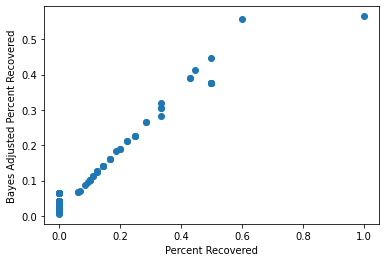

In [ ]:
plt.scatter(player_df['Percentage_Recovered'],player_df['Percentage_Recovered_Bayes'])
plt.xlabel('Percent Recovered')
plt.ylabel('Bayes Adjusted Percent Recovered')

Text(0, 0.5, 'Frequency')

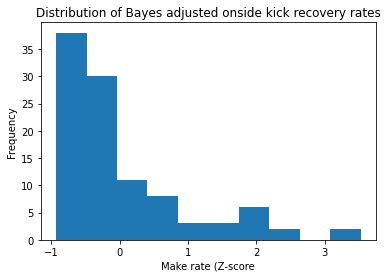

In [ ]:
# Get zcores for bayes adjusted onside kicks
onside_zscores = scipy.stats.zscore(player_df['Percentage_Recovered_Bayes'])


# Creating histogram for onside kick z-scores
fig, ax = plt.subplots(1, 1)
ax.hist(onside_zscores)
  
# Set title
ax.set_title("Distribution of Bayes adjusted onside kick recovery rates")

# adding labels
ax.set_xlabel('Make rate (Z-score')
ax.set_ylabel('Frequency')




# Luck vs. Skill using FG%

In [ ]:
fg_player_df = fg_df_final.groupby(['Player'])[['G', 'FGA', 'FGM']].sum()

In [ ]:
fg_player_df = fg_player_df.reset_index(drop = False)

In [ ]:
fg_player_df.head(5)

,Player,G,FGA,FGM
0,AJ Cole III,49.0,0.0,0.0
1,Adam Podlesh,32.0,0.0,0.0
2,Adam Vinatieri,122.0,186.0,152.0
3,Aldrick Rosas,59.0,65.0,33.0
4,Alex Henery,34.0,42.0,15.0


In [ ]:
fg_player_df['FG%'] = fg_player_df['FGM']/fg_player_df['FGA']

In [ ]:
fg_player_df

,Player,G,FGA,FGM,FG%
0,AJ Cole III,49.0,0.0,0.0,NaN
1,Adam Podlesh,32.0,0.0,0.0,NaN
2,Adam Vinatieri,122.0,186.0,152.0,0.817204
3,Aldrick Rosas,59.0,65.0,33.0,0.507692
4,Alex Henery,34.0,42.0,15.0,0.357143
...,...,...,...,...,...
180,Wil Lutz,80.0,124.0,103.0,0.830645
181,Younghoe Koo,44.0,70.0,63.0,0.900000
182,Zach Hocker,8.0,11.0,7.0,0.636364
183,Zane Gonzalez,63.0,85.0,63.0,0.741176


In [ ]:
fg_player_df = fg_player_df.dropna()

In [ ]:
fg_player_df

,Player,G,FGA,FGM,FG%
2,Adam Vinatieri,122.0,186.0,152.0,0.817204
3,Aldrick Rosas,59.0,65.0,33.0,0.507692
4,Alex Henery,34.0,42.0,15.0,0.357143
6,Andrew Franks,32.0,23.0,17.0,0.739130
9,Austin Seibert,27.0,44.0,29.0,0.659091
...,...,...,...,...,...
179,Tyler Bass,33.0,41.0,31.0,0.756098
180,Wil Lutz,80.0,124.0,103.0,0.830645
181,Younghoe Koo,44.0,70.0,63.0,0.900000
182,Zach Hocker,8.0,11.0,7.0,0.636364


In [ ]:
fg_pop_mean = sa.Average(fg_player_df['FG%'], fg_player_df['FGA'])
fg_pop_stdev = sa.Stddev(fg_player_df['FG%'], fg_player_df['FGA'])

fg_sample_mean = fg_player_df['FG%']

## We do standard deviation like this because we have a bernoulli random variable (2 outcomes [made or not], and so our stdev is sqrt(p*(1-p)))
fg_player_df['std_dev_fg'] = np.sqrt(fg_player_df[['FG%']]*(1-fg_player_df[['FG%']]))
fg_sample_stdev = fg_player_df['std_dev_fg']

fg_n_obs = fg_player_df['FGA']

fg_rate_bayes, fg_std = sa.Bayes_normal(mean = fg_pop_mean, stdev = fg_pop_stdev, Nob = fg_n_obs, sample_mean = fg_sample_mean, sample_stdev = fg_sample_stdev)

fg_player_df['FG%_Bayes'] = fg_rate_bayes



<ipython-input-37-3e6be4ef449e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fg_player_df['std_dev_fg'] = np.sqrt(fg_player_df[['FG%']]*(1-fg_player_df[['FG%']]))
<ipython-input-37-3e6be4ef449e>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fg_player_df['FG%_Bayes'] = fg_rate_bayes


Text(0, 0.5, 'Field Goal % (Bayes Adjusted)')

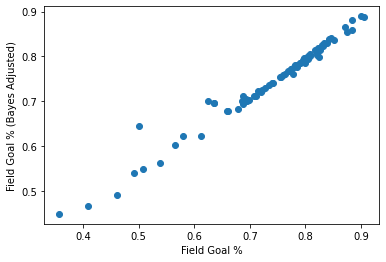

In [ ]:
plt.scatter(fg_player_df['FG%'],fg_player_df['FG%_Bayes'])
plt.xlabel('Field Goal %')
plt.ylabel('Field Goal % (Bayes Adjusted)')

In [ ]:
fg_player_df

,Player,G,FGA,FGM,FG%,std_dev_fg,FG%_Bayes
2,Adam Vinatieri,122.0,186.0,152.0,0.817204,0.386499,0.814061
3,Aldrick Rosas,59.0,65.0,33.0,0.507692,0.499941,0.550324
4,Alex Henery,34.0,42.0,15.0,0.357143,0.479157,0.449192
6,Andrew Franks,32.0,23.0,17.0,0.739130,0.439109,0.741107
9,Austin Seibert,27.0,44.0,29.0,0.659091,0.474015,0.678483
...,...,...,...,...,...,...,...
179,Tyler Bass,33.0,41.0,31.0,0.756098,0.429435,0.753888
180,Wil Lutz,80.0,124.0,103.0,0.830645,0.375065,0.825469
181,Younghoe Koo,44.0,70.0,63.0,0.900000,0.300000,0.889455
182,Zach Hocker,8.0,11.0,7.0,0.636364,0.481046,0.695678


In [ ]:
fg_player_df = fg_player_df.sort_values('FG%_Bayes', ascending = 0)

fg_player_df = fg_player_df.dropna()

fg_player_df

,Player,G,FGA,FGM,FG%,std_dev_fg,FG%_Bayes
181,Younghoe Koo,44.0,70.0,63.0,0.900000,0.300000,0.889455
161,Shaun Suisham,48.0,42.0,38.0,0.904762,0.293544,0.888094
92,Justin Tucker,161.0,275.0,243.0,0.883636,0.320660,0.880755
65,Harrison Butker,77.0,124.0,108.0,0.870968,0.335236,0.864805
71,Jake Elliott,17.0,26.0,23.0,0.884615,0.319486,0.859177
...,...,...,...,...,...,...,...
3,Aldrick Rosas,59.0,65.0,33.0,0.507692,0.499941,0.550324
23,Brett Maher,37.0,61.0,30.0,0.491803,0.499933,0.539704
122,Mike Nugent,92.0,115.0,53.0,0.460870,0.498466,0.491992
118,Michael Badgley,47.0,66.0,27.0,0.409091,0.491666,0.467047


In [ ]:
fg_player_df = fg_player_df.rename(columns = {'FG%':'FG_Percent', 'FG%_Bayes':'FG_Percent_Bayes'})

In [ ]:
## Skill Regression
fg_model = smf.wls('FG_Percent_Bayes ~ FG_Percent', data = fg_player_df, weights = fg_player_df['FGA']).fit()
print(fg_model.summary())

                            WLS Regression Results                            
Dep. Variable:       FG_Percent_Bayes   R-squared:                       0.991
Model:                            WLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     8417.
Date:                Fri, 02 Dec 2022   Prob (F-statistic):           3.77e-77
Time:                        21:35:21   Log-Likelihood:                 244.52
No. Observations:                  75   AIC:                            -485.0
Df Residuals:                      73   BIC:                            -480.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1035      0.007     14.394      0.0

In [ ]:
# fg_player_df.to_csv('/content/drive/My Drive/fg_player_df.csv',index=False)

# Simple Onside vs FG Regression


In [ ]:
os_fg_df = player_df.merge(fg_player_df, on = 'Player')

In [ ]:
os_fg_df = os_fg_df.sort_values('FG_Percent_Bayes', ascending = 0)

os_fg_df

,Player,Onside Kickoffs,Onside Recovered,Percentage_Recovered,Percentage_Recovered_Bayes,G,FGA,FGM,FG_Percent,std_dev_fg,FG_Percent_Bayes
2,Younghoe Koo,6,3,0.500000,0.447174,44.0,70.0,63.0,0.900000,0.300000,0.889455
59,Shaun Suisham,6,0,0.000000,0.018602,48.0,42.0,38.0,0.904762,0.293544,0.888094
34,Justin Tucker,15,1,0.066667,0.070639,161.0,275.0,243.0,0.883636,0.320660,0.880755
43,Harrison Butker,2,0,0.000000,0.043406,77.0,124.0,108.0,0.870968,0.335236,0.864805
5,Jason Hanson,2,1,0.500000,0.376739,16.0,32.0,28.0,0.875000,0.330719,0.853882
...,...,...,...,...,...,...,...,...,...,...,...
20,Chandler Catanzaro,7,1,0.142857,0.141277,77.0,106.0,57.0,0.537736,0.498574,0.562157
21,Aldrick Rosas,7,1,0.142857,0.141277,59.0,65.0,33.0,0.507692,0.499941,0.550324
58,Brett Maher,6,0,0.000000,0.018602,37.0,61.0,30.0,0.491803,0.499933,0.539704
61,Mike Nugent,6,0,0.000000,0.018602,92.0,115.0,53.0,0.460870,0.498466,0.491992


Text(0, 0.5, 'Onside Kick Make Percentage (Bayes Adjusted)')

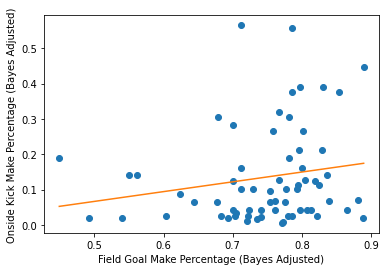

In [ ]:
#plt.scatter(os_fg_df['FG_Percent_Bayes'],os_fg_df['Percentage_Recovered_Bayes'])
x = os_fg_df['FG_Percent_Bayes']
y = os_fg_df['Percentage_Recovered_Bayes']
m, b = np.polyfit(x, y, 1)
plt.plot(x,y,'o')
plt.plot(x, m*x+b)
plt.xlabel("Field Goal Make Percentage (Bayes Adjusted)")
plt.ylabel("Onside Kick Make Percentage (Bayes Adjusted)")

# Onside Kick Recovery Rate Discussion